In [2]:
import os
import keras as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import LeakyReLU
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
file = 'dataset_1'

train_datagen = K.preprocessing.image.ImageDataGenerator()

validation_datagen = K.preprocessing.image.ImageDataGenerator()

test_datagen = K.preprocessing.image.ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        os.path.join(file, 'train'),
        target_size=(50, 50),
        batch_size=1,
        color_mode='grayscale',
        class_mode='categorical',
        )

validation_generator = validation_datagen.flow_from_directory(
        os.path.join(file, 'validation'),
        target_size=(50, 50),
        batch_size=1,
        color_mode='grayscale',
        class_mode="categorical",
        )

test_generator = validation_datagen.flow_from_directory(
        os.path.join(file, 'test'),
        target_size=(50, 50),
        batch_size=1,
        color_mode='grayscale',
        class_mode="categorical",
        )

Found 12556 images belonging to 28 classes.
Found 1710 images belonging to 28 classes.
Found 3515 images belonging to 28 classes.


In [12]:
# test_generator.reset()
# ex = test_generator.next()
# print(ex[1].argmax(axis=-1))
# len(ex[0][0])
X_test = []
y_test = []
for i in range(len(test_generator)):
    X_ex, y_ex = test_generator.next()
    X_test.append(X_ex)
    y_test.append(y_ex)

In [13]:
early_stop = K.callbacks.EarlyStopping(monitor='val_acc',
                              min_delta=0,
                              patience=3,
                              verbose=0, mode='max')

In [14]:
class LeNetRelu:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        
        model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        model.add(Conv2D(50, kernel_size=5, border_mode="same"))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model
    
class LeNetLeakyRelu:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        
        model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=input_shape))
        model.add(LeakyReLU())
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        model.add(Conv2D(50, kernel_size=5, border_mode="same"))
        model.add(LeakyReLU())
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        model.add(Flatten())
        model.add(Dense(500))
        model.add(LeakyReLU())
        
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

In [15]:
INPUT_SHAPE = (50, 50, 1)
NB_EPOCH = 10
BATCH_SIZE = 32
VERBOSE = 1
OPTIMIZER = SGD()
CLASSES = 28
STEPS = (int)(train_generator.n/BATCH_SIZE)

In [32]:
model = LeNetRelu.build(input_shape=INPUT_SHAPE, classes=CLASSES)

model.summary()

model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 20)        520       
_________________________________________________________________
activation_5 (Activation)    (None, 50, 50, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 50)        25050     
_________________________________________________________________
activation_6 (Activation)    (None, 25, 25, 50)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
__________

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, padding="same")`
  # Remove the CWD from sys.path while we load stuff.


In [33]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS,
        epochs=NB_EPOCH,
#         verbose=VERBOSE,
        validation_data=validation_generator,
#         validation_steps=STEPS,
        callbacks = [early_stop]
)

Epoch 1/10
392/392 [==============================] - 6s 16ms/step - loss: 15.5488 - acc: 0.0332 - val_loss: 15.3358 - val_acc: 0.0485
Epoch 2/10
392/392 [==============================] - 6s 16ms/step - loss: 15.5424 - acc: 0.0357 - val_loss: 15.3358 - val_acc: 0.0485
Epoch 3/10
392/392 [==============================] - 6s 15ms/step - loss: 15.6658 - acc: 0.0281 - val_loss: 15.3358 - val_acc: 0.0485
Epoch 4/10
392/392 [==============================] - 6s 15ms/step - loss: 15.2546 - acc: 0.0536 - val_loss: 15.3358 - val_acc: 0.0485


In [47]:
# pred = model.predict_generator(test_generator)
X_test = []
y_test = []
y_pred = []
for i in range(len(test_generator)):
    X_ex, y_ex = test_generator.next()
    X_test.append(X_ex)
    y_test.append(y_ex.argmax(axis=-1))
    y_pred.append(model.predict(X_ex).argmax(axis=-1))
    
val_f1_score = f1_score(y_test, y_pred, average='micro')
val_f1_score

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


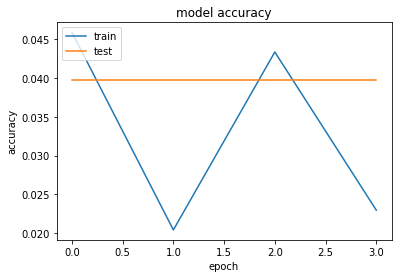

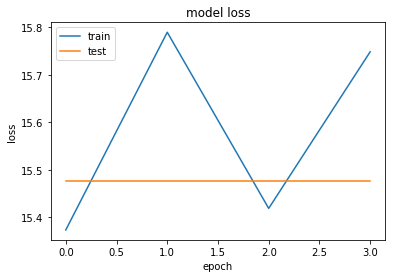

In [33]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
model = LeNetLeakyRelu.build(input_shape=INPUT_SHAPE, classes=CLASSES)

model.summary()

model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 50, 50, 20)        520       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 50, 50, 20)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 20)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 25, 25, 50)        25050     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 25, 25, 50)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7200)              0         
__________

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, padding="same")`


In [37]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS,
        epochs=NB_EPOCH,
#         verbose=VERBOSE,
        validation_data=validation_generator,
#         validation_steps=STEPS,
        callbacks = [early_stop]
)

Epoch 1/10
392/392 [==============================] - 7s 17ms/step - loss: 15.2989 - acc: 0.0485 - val_loss: 15.5525 - val_acc: 0.0351
Epoch 2/10
392/392 [==============================] - 6s 16ms/step - loss: 15.7069 - acc: 0.0255 - val_loss: 15.5525 - val_acc: 0.0351
Epoch 3/10
392/392 [==============================] - 6s 16ms/step - loss: 15.4602 - acc: 0.0408 - val_loss: 15.5525 - val_acc: 0.0351
Epoch 4/10
392/392 [==============================] - 6s 16ms/step - loss: 15.3369 - acc: 0.0485 - val_loss: 15.5525 - val_acc: 0.0351


In [39]:
# pred = model.predict_generator(test_generator)
X_test = []
y_test = []
y_pred = []
for i in range(len(test_generator)):
    X_ex, y_ex = test_generator.next()
    X_test.append(X_ex)
    y_test.append(y_ex.argmax(axis=-1))
    y_pred.append(model.predict(X_ex).argmax(axis=-1))
    
val_f1_score = f1_score(y_test, y_pred, average='micro')
val_f1_score

0.032432432432432434

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


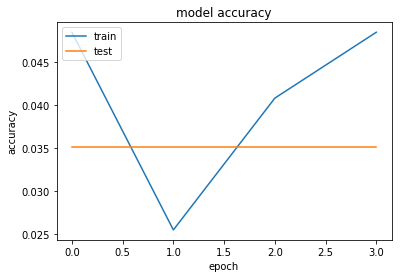

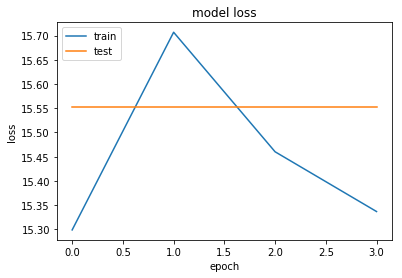

In [40]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()